In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score, max_error
from sklearn.linear_model import LinearRegression


In [2]:
df = pd.read_csv('../data/train.csv')

In [3]:
df = df[df['ciudad']=="Mérida"].dropna()

In [4]:
#En la manipulación del data frame hice algunos líos, podría ser más claro.
X = df[['metrostotales','metroscubiertos']]

In [5]:
X = df[['metrostotales','metroscubiertos']]
z = df['precio'].values

Xlearn = X[:400]
Xtest = X[400:]

In [6]:
xlearn = Xlearn.values.reshape(len(Xlearn),2)
xtest = Xtest.values.reshape(len(Xtest),2)
z = z.reshape(len(z),1)
              


Text(0.5, 0, 'Precio')

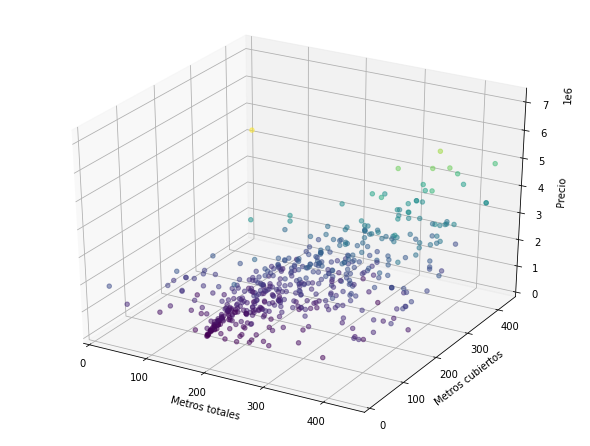

In [7]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# axes instance
fig = plt.figure(figsize=(8,6))
ax = Axes3D(fig)


sc = ax.scatter(X.values[:,0], X.values[:,1], z, c=z, alpha=0.5)
ax.set_xlabel('Metros totales')
ax.set_ylabel('Metros cubiertos')
ax.set_zlabel('Precio')


In [8]:
#la regresión lineal aprende de las priemeras 400 entradas del data frame
linear_regressor = LinearRegression()
linear_regressor.fit(Xlearn,z[:400])

LinearRegression()

In [9]:
#con las instancias a partir de la fila 400 empiezo a predecir precios, y sumo a un df de pruebas las predicciones
dfpruebas = df[['metrostotales','metroscubiertos', 'precio']][400:]
dfpruebas['prediction'] = linear_regressor.predict(xtest)

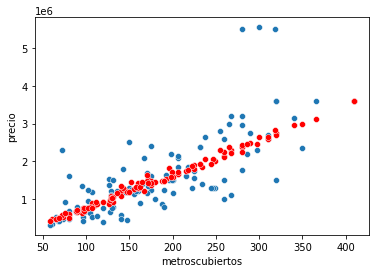

In [10]:
sns.scatterplot(data=dfpruebas, x='metroscubiertos', y='precio')
sns.scatterplot(data=dfpruebas, x='metroscubiertos', y='prediction', color='red')


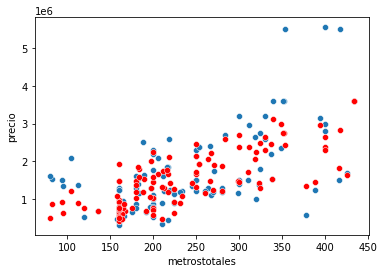

In [11]:
sns.scatterplot(data=dfpruebas, x='metrostotales', y='precio')
sns.scatterplot(data=dfpruebas, x='metrostotales', y='prediction', color='red')

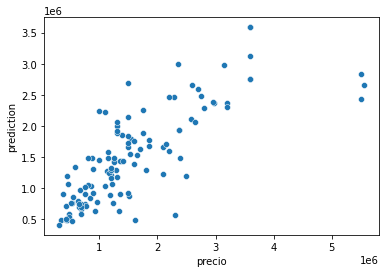

In [12]:
sns.scatterplot(data=dfpruebas, x='precio', y='prediction')

In [13]:
precios = dfpruebas['precio'].values
prediccion = dfpruebas['prediction'].values

#el array de errores no lo usé al final
error = np.abs(precios-prediccion)

In [14]:
#RMSE
mean_squared_error(precios,prediccion)

445452093640.75446

In [15]:
#RMSLE
mean_squared_log_error(precios,prediccion)

0.14806503914788977

In [16]:
#R2
r2_score(precios, prediccion)

0.598451891016123

In [17]:
#MÁXIMO ERROR
max_error(precios, prediccion)

3061890.674786481

In [18]:
# Acá estoy intentando normalizar el error, no estoy seguro de que haya funcionado
prices = (precios/(precios+prediccion))
prediction = (prediccion/(precios+prediccion))

#MÁXIMO ERROR NORMALIZADO

max_error(prices, prediction)

0.6041930233929923